<a href="https://colab.research.google.com/github/ArthBR1/Analise-da-Malha-Aerea-Europeia/blob/main/Projeto_2021_Q3_CR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comunicação e Redes [2021.Q3]**
Prof. Alexandre Donizeti Alves
----

**Por favor, informe o seu nome, turma e RA:**

---
**Nome**: *Arthur Alves Guilhen*

**Turma**: *B1 diurno*

**RA**: *11202022220*

### **PROJETO PRÁTICO**
---

**Análise da malha aérea europeia e suas características**
---

Esse projeto tem como objetivo fazer uma análise da malha aérea europeia e suas principais características, levando em consideração apenas as rotas de voos que ocorrem dentro do continente europeu (da Europa para a Europa).

In [ ]:
!pip install networkx
!pip install algorithmx

     |████████████████████████████████| 1.6 MB 34.1 MB/s 


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt

**Coleta e preparação dos dados:**
---

Para o dezenvolvimento desse trabalho, foram utilizados três datasets, sendo dois deles retirados do Kaggle, que listam todos os aeroportos do mundo e suas rotas, e um autoral, que lista apenas os aeroportos europeus, com base em suas siglas.

São eles os seguintes datasets:

- Lista de aeroportos do mundo, com nome, sigla e coordenadas:

In [ ]:
url = 'https://drive.google.com/file/d/14bMtgVqoKjNmZ9e6dT2a0d5SMVBoauDC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

lista_de_aeroportos = pd.read_csv(filepath_or_buffer=path, sep=",")

tabela_de_aeroportos = pd.DataFrame(lista_de_aeroportos)
tabela_de_aeroportos

,Label,ID,Latitude,Longitude
0,Goroka Airport,GKA,-6.081690,145.391998
1,Madang Airport,MAG,-5.207080,145.789001
2,Mount Hagen Kagamuga Airport,HGU,-5.826790,144.296005
3,Nadzab Airport,LAE,-6.569803,146.725977
4,Port Moresby Jacksons International Airport,POM,-9.443380,147.220001
...,...,...,...,...
9070,Liangping Airport,LIA,30.679399,107.786003
9071,Öndörkhaan Airport,UNR,47.304860,110.609200
9072,Chengdu Tianfu International Airport,TFU,30.312520,104.441284
9073,Chongqing Wushan Airport,WSK,31.068960,109.708958


- Lista de rotas entre os aeroportos do mundo:

In [ ]:
url = 'https://drive.google.com/file/d/1WudgD58sHHpf5vGZH7UEKKqYqUeqIqRy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

lista_de_rotas = pd.read_csv(filepath_or_buffer=path, sep=",")

tabela_de_rotas = pd.DataFrame(lista_de_rotas)
tabela_de_rotas

,Airline ID,Departure,Destination
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
92690,UA,PIR,ATY
92691,UA,CGI,PAH
92692,UA,ATY,DEN
92693,UA,ATY,PIR


- Lista de aeroportos europeus (siglas):

In [ ]:
url = 'https://drive.google.com/file/d/1pRnaAH6CIEz79anuw6JBI0gaCwSjpaTG/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

aeroportos_europeus = pd.read_csv(filepath_or_buffer=path, sep=",")

tabela_de_aeroportos_europeus = pd.DataFrame(aeroportos_europeus)
tabela_de_aeroportos_europeus

,ID
0,TIA
1,FRA
2,MUC
3,BER
4,HAM
...,...
206,AYT
207,DLM
208,KBP
209,IEV


Como os dados das duas primeiras listas contêm informações de todos aeroportos do mundo, inicialmente vamos tratar os dados para que apenas os aeroportos europeus sejam levados em consideração.

- Programa python que trata os dados da lista de aeroportos:

In [ ]:
for i in tabela_de_aeroportos.index:
  esta_na_tabela1 = 0
  for j in tabela_de_aeroportos_europeus.index:
    sigla1 = tabela_de_aeroportos["ID"][i]
    sigla_euro = tabela_de_aeroportos_europeus["ID"][j]
    if sigla1 == sigla_euro:
      esta_na_tabela1 = 1
  if esta_na_tabela1 == 0:
    tabela_de_aeroportos = tabela_de_aeroportos.drop(index=i)

tabela_de_aeroportos

,Label,ID,Latitude,Longitude
15,Keflavik International Airport,KEF,63.985001,-22.605600
17,Reykjavik Airport,RKV,64.129997,-21.940599
280,Antwerp International Airport (Deurne),ANR,51.189400,4.460280
281,Brussels Airport,BRU,50.901402,4.484440
282,Brussels South Charleroi Airport,CRL,50.459202,4.453820
...,...,...,...,...
3838,S�rmell�k International Airport,SOB,46.686391,17.159084
3852,�ilina Airport,ILZ,49.231499,18.613501
5216,Modlin Airport,WMI,52.451099,20.651800
6045,Istanbul Airport,IST,41.275278,28.751944


- Programas python que tratam os dados da lista de rotas:

In [ ]:
for i in tabela_de_rotas.index:
  esta_na_tabela2 = 0
  for j in tabela_de_aeroportos_europeus.index:
    sigla2 = tabela_de_rotas["Departure"][i]
    sigla_euro = tabela_de_aeroportos_europeus["ID"][j]
    if sigla2 == sigla_euro:
      esta_na_tabela2 = 1
  if esta_na_tabela2 == 0:
    tabela_de_rotas = tabela_de_rotas.drop(index=i)

tabela_de_rotas

,Airline ID,Departure,Destination
5,2B,DME,KZN
6,2B,DME,NBC
7,2B,DME,TGK
8,2B,DME,UUA
11,2B,GYD,NBC
...,...,...,...
92384,TK,ECN,HTY
92387,TK,ADB,GNY
92394,TK,SAW,LTAT
92432,UA,AMS,SFO


In [ ]:
for i in tabela_de_rotas.index:
  esta_na_tabela3 = 0
  for j in tabela_de_aeroportos_europeus.index:
    sigla3 = tabela_de_rotas["Destination"][i]
    sigla_euro = tabela_de_aeroportos_europeus["ID"][j]
    if sigla3 == sigla_euro:
      esta_na_tabela3 = 1
  if esta_na_tabela3 == 0:
    tabela_de_rotas = tabela_de_rotas.drop(index=i)

tabela_de_rotas

,Airline ID,Departure,Destination
5,2B,DME,KZN
16,2B,KZN,DME
18,2B,KZN,LED
19,2B,KZN,SVX
20,2B,LED,KZN
...,...,...,...
92300,TK,DLM,SAW
92375,TK,ADB,ECN
92376,TK,ECN,ADB
92379,TK,AYT,ECN


Agora, com os dados tratados, conseguimos formar o seguinte grafo:

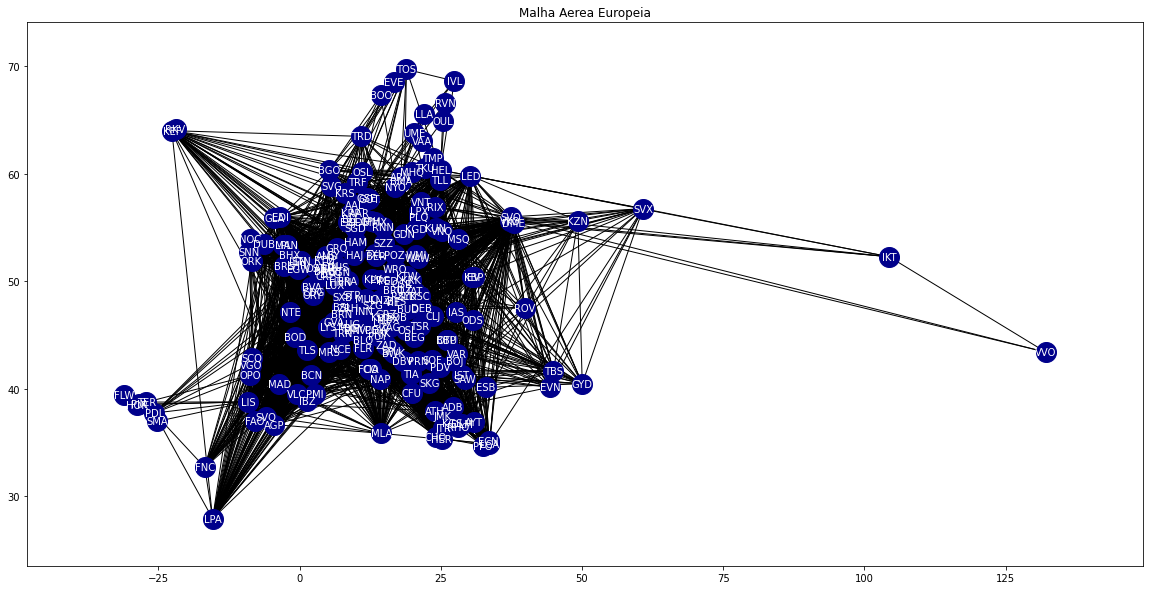

In [ ]:
Europa = nx.Graph()

for i in tabela_de_aeroportos.index:
    sigla = tabela_de_aeroportos["ID"][i]
    latitude = tabela_de_aeroportos["Latitude"][i]
    longitude = tabela_de_aeroportos["Longitude"][i]
    Europa.add_node(sigla , pos=(longitude, latitude))

for i in tabela_de_rotas.index:
    Europa.add_edge(tabela_de_rotas['Departure'][i], tabela_de_rotas['Destination'][i].replace(' ', ''))

posicoes = nx.get_node_attributes(Europa, 'pos')

fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Malha Aerea Europeia')
nx.draw(G=Europa, pos=posicoes, with_labels=True, ax=ax, node_size=400, node_color='darkblue', font_color="white", font_size=10)

ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

plt.show()

Mapa Europa:

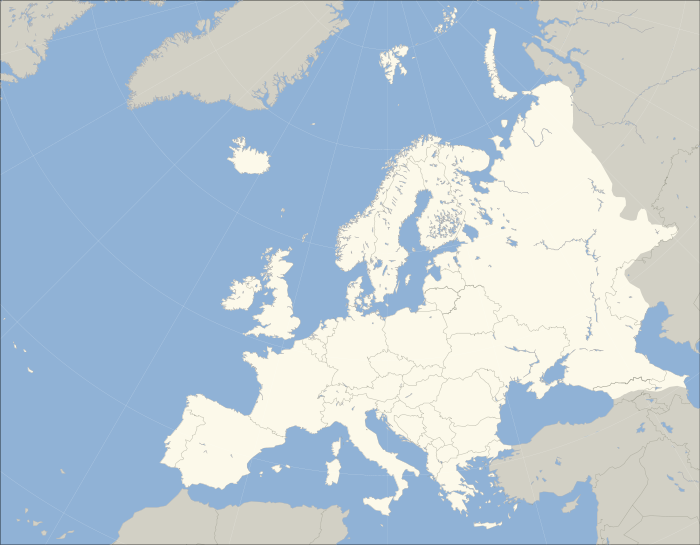

Podemos perceber que o formato do grafo ficou relativamente fiel ao mapa europeu.

Ordem do grafo:

In [ ]:
Europa.order()

211

Tamanho do grafo:

In [ ]:
Europa.size()

3962

**Modelagem do Grafo:**
---

Para a modelagem do grafo, foram utilizadas as coordenadas dos aeroportos europeus para posicionar os vértices da forma mais aproximada possível com a realidade, e as rotas entre os aeroportos para formar as arestas.

**Análise e Resultados:**
---

Inicialmente, vamos analisar as principais características que o grafo.

O grafo é conexo?

In [ ]:
print(nx.is_connected(Europa))

False


Só com essa informação, sabemos que é impossível traçar um caminho entre dois aeroportos quaisquer. Agora, vamos analisar quais são os aeroportos com maior e menor número de rotas (conexões).

Aeroporto com maior número de rotas:

In [ ]:
maior = max([Europa.degree(i) for i in Europa.nodes()])
VeA = dict(Europa.degree())
aeroporto = max(VeA, key=lambda key: VeA[key])
for i in tabela_de_aeroportos.index:
  if tabela_de_aeroportos["ID"][i] == aeroporto:
    nome_aeroporto = tabela_de_aeroportos["Label"][i]
print('O aeroporto com maior número de rotas conectadas com outros aeroportos é o %s com %d rotas.'% (nome_aeroporto,maior))

O aeroporto com maior número de rotas conectadas com outros aeroportos é o Amsterdam Airport Schiphol com 121 rotas.


Aeroporto com menor número de rotas:

In [ ]:
menor = min([Europa.degree(i) for i in Europa.nodes()])
VeA = dict(Europa.degree())
aeroporto = min(VeA, key=lambda key: VeA[key])
for i in tabela_de_aeroportos.index:
  if tabela_de_aeroportos["ID"][i] == aeroporto:
    nome_aeroporto = tabela_de_aeroportos["Label"][i]
print('O aeroporto com menor número de rotas conectadas com outros aeroportos é o %s com %d rotas.'% (nome_aeroporto,menor))

O aeroporto com menor número de rotas conectadas com outros aeroportos é o Reykjavik Airport com 0 rotas.


Sabendo que o Reykjavik Airport não tem nenhuma rota com outro aeroporto europeu, compreendemos o porquê do grafo não ser conexo.

Apesar do Amsterdam Airport Schiphol ser o aeroporto, ainda não podemos afirmar que ele é o aeroporto mais importante da Europa. Para afirmar isso, vamos fazer uma análise das propriedades do grafo:

-  Centralidade:

In [ ]:
# centralidade relativa de grau

CRdG = nx.degree_centrality(Europa)
maior = max(CRdG.values())
for aeroporto, valor in CRdG.items() :
  if valor == maior:
    for i in tabela_de_aeroportos.index:
      if tabela_de_aeroportos["ID"][i] == aeroporto:
        nome_aeroporto = tabela_de_aeroportos["Label"][i]
    print("A maior centralidade relativa de grau é a do %s com %f."% (nome_aeroporto,valor))

# centralidade relativa de proximidade

CRdP = nx.closeness_centrality(Europa)
maior2 = max(CRdP.values())
for aeroporto, valor in CRdP.items() :
  if valor == maior2:
    for i in tabela_de_aeroportos.index:
      if tabela_de_aeroportos["ID"][i] == aeroporto:
        nome_aeroporto = tabela_de_aeroportos["Label"][i]
    print("A maior centralidade relativa de proximidade é a do %s com %f."% (nome_aeroporto,valor))

# centralidade relativa de intermediacao

CRdI = nx.betweenness_centrality(Europa)
maior3 = max(CRdI.values())
for aeroporto, valor in CRdI.items() :
  if valor == maior3:
    for i in tabela_de_aeroportos.index:
      if tabela_de_aeroportos["ID"][i] == aeroporto:
        nome_aeroporto = tabela_de_aeroportos["Label"][i]
    print("A maior centralidade relativa de intermediação é a do %s com %f."% (nome_aeroporto,valor))

A maior centralidade relativa de grau é a do Amsterdam Airport Schiphol com 0.576190.
A maior centralidade relativa de proximidade é a do Amsterdam Airport Schiphol com 0.680780.
A maior centralidade relativa de intermediação é a do Copenhagen Kastrup Airport com 0.043450.


Podemos perceber que o Amsterdam Airport Schiphol é o aeroporto mais importante da Europa quando se trata de conexões e proximidade em comparação aos demais aeroportos, porem, ele perde para o Copenhagen Kastrup Airport quando se trata de intermediação.

In [ ]:
maior = max([Europa.degree(i) for i in Europa.nodes()])
VeA = dict(Europa.degree())
aeroporto = max(VeA, key=lambda key: VeA[key])
print(nx.shortest_path_length(Europa, aeroporto))

{'AMS': 0, 'TBS': 1, 'GLA': 1, 'KEF': 1, 'SXB': 1, 'LGW': 1, 'BUD': 1, 'HAJ': 1, 'SVG': 1, 'SZG': 1, 'ORY': 1, 'WAW': 1, 'TLL': 1, 'KRS': 1, 'FLR': 1, 'CPH': 1, 'SCQ': 1, 'TOS': 1, 'HEL': 1, 'ZRH': 1, 'TRN': 1, 'INN': 1, 'ATH': 1, 'VLC': 1, 'BOJ': 1, 'ADB': 1, 'CGN': 1, 'FCO': 1, 'AYT': 1, 'FRA': 1, 'NAP': 1, 'TRF': 1, 'SKG': 1, 'STN': 1, 'WRO': 1, 'LIS': 1, 'KRK': 1, 'EDI': 1, 'TXL': 1, 'LJU': 1, 'LED': 1, 'PDL': 1, 'OPO': 1, 'IVL': 1, 'PMI': 1, 'BLQ': 1, 'MRS': 1, 'GDN': 1, 'VNO': 1, 'CDG': 1, 'SVO': 1, 'IST': 1, 'RIX': 1, 'MUC': 1, 'ARN': 1, 'DLM': 1, 'BLL': 1, 'DUS': 1, 'BGO': 1, 'LHR': 1, 'LYS': 1, 'SOF': 1, 'DUB': 1, 'JTR': 1, 'KTW': 1, 'DBV': 1, 'HER': 1, 'LTN': 1, 'ORK': 1, 'VIE': 1, 'BER': 1, 'MXP': 1, 'BRS': 1, 'LGG': 1, 'RHO': 1, 'NTE': 1, 'FNC': 1, 'OSL': 1, 'BSL': 1, 'AAL': 1, 'JMK': 1, 'LPL': 1, 'CFU': 1, 'MAN': 1, 'FAO': 1, 'LCA': 1, 'HAM': 1, 'BEG': 1, 'TIA': 1, 'LIN': 1, 'SAW': 1, 'SVQ': 1, 'MSQ': 1, 'STR': 1, 'GRZ': 1, 'BOD': 1, 'BCN': 1, 'NCE': 1, 'TLS': 1, 'GVA': 1,

A análise dos valores de caminho minimo do Amsterdam Airport Schiphol também mostrou a impotância dele quando observamos suas rotas, pois ele está sempre a no máximo 2 "caminhos" de distância em relação aos outros aeroportos.

Vamos analisar outras propriedades do grafo.

- Coeficiente de Clusterização:

In [ ]:
print(nx.average_clustering(Europa))

0.5799281293750136


O Coeficiente de Clusterização do grafo tem um valor "intermediario", tendo assim nós não muito agrupados.

- Densidade:

In [ ]:
print(nx.density(Europa))

0.17883096366508688


A baixa Densidade do grafo mostra que seus nós não estão muito conectados entre si, ou seja, a grande maioria dos aeroportos não têm rotas para todos os demais aeroportos, tendo rotas apenas para alguns.

- Distribuição de Graus:

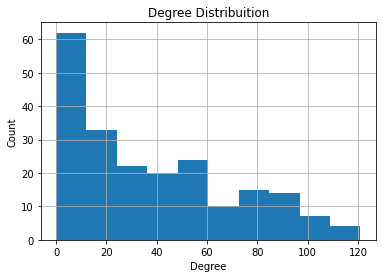

In [ ]:
degrees = [Europa.degree(n) for n in Europa.nodes()]

plt.hist(degrees)
plt.title("Degree Distribuition")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.grid(True)

plt.show()

A Distribuição de Graus do grafo mostra que a grande maioria dos nós têm graus baixos, ou seja, assim como na Densidade, mostra que a maioria dos aeroportos não têm rotas para todos os demais aeroportos.

- Coreness do Grafo:

In [ ]:
print(nx.core_number(Europa).values())

dict_values([32, 0, 1, 37, 34, 7, 4, 37, 37, 37, 37, 37, 37, 37, 36, 22, 29, 37, 4, 3, 2, 2, 8, 7, 2, 37, 37, 37, 30, 37, 37, 37, 32, 37, 37, 37, 9, 36, 8, 0, 25, 26, 37, 11, 19, 12, 32, 37, 2, 1, 0, 1, 1, 12, 37, 5, 32, 9, 5, 37, 12, 28, 20, 26, 32, 37, 29, 24, 11, 37, 30, 36, 14, 26, 12, 6, 3, 37, 6, 37, 25, 13, 2, 37, 16, 36, 28, 34, 8, 20, 11, 33, 34, 20, 37, 36, 37, 37, 21, 37, 5, 37, 37, 37, 37, 37, 37, 29, 37, 37, 37, 37, 19, 36, 29, 29, 14, 34, 30, 14, 36, 37, 8, 37, 37, 21, 27, 37, 37, 30, 37, 37, 25, 20, 0, 0, 4, 4, 2, 37, 2, 37, 12, 11, 9, 20, 37, 2, 3, 37, 3, 3, 11, 3, 37, 37, 0, 27, 19, 37, 14, 37, 2, 9, 37, 22, 36, 30, 23, 36, 21, 28, 13, 0, 0, 1, 21, 3, 5, 37, 29, 20, 36, 10, 29, 15, 16, 37, 29, 13, 37, 1, 37, 21, 6, 33, 17, 24, 37, 36, 31, 3, 37, 5, 0, 5, 0, 0, 29, 37, 34])


O fato do grafo não ser conexo impede a análise de outras propriedades.

Com a análise dos dados apresentados anteriormente, podemos perceber que a malha aérea europeia permite que o continente europeu seja muito bem interligado, permitindo viagens entre paraticamente todos os países. Além disso, podemos perceber que a quantidade de aeroportos de uma certa região do continente está diretamente relacionada ao desenvolvimento dessa região, pois nota-se que o oeste europeu tem uma quantidade de aeroportos maior que o leste, além do maior número de rotas.

**Contribuições dos membros da equipe:**
---

O trabalho foi realizado individualmente.

**Referências:**
---

Datasets com os aeroportos/rotas: https://www.kaggle.com/moonnectar/airline-routes-92k-and-airports-10k-dataset

Lista de aeroportos europeus (usada como fonte para produção do dataset autoral): https://www.aeroportosdomundo.com/br/europa/

Mapa da Europa: https://pt.wikipedia.org/wiki/Europa

IDH dos países europeus: https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_da_Europa_por_%C3%8Dndice_de_Desenvolvimento_Humano

**IMPORTANTE**:


---

>
>
Inicialmente, preencham os dados do **Projeto Prático** na seguinte planilha:

> https://docs.google.com/spreadsheets/d/1NLVfFUs9d0siNpSyngK-8ci4Cjl6zVhWGJtEXlbFGlk/edit?usp=sharing

O **Projeto Prático** deve ser feito usando o **Google Colab** com uma conta sua vinculada ao Gmail. O link do seu notebook, armazenado no Google Drive, deve ser enviado usando o seguinte formulário:

> https://forms.gle/qdWETwCrhmBszfZd8

A submissão deve ser feita até o dia **05/12/2021** (domingo - até às 23h59). Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO.